# Simulating Data for Fun and Profit

While we are usually concerned with analyzing and visualizing real world data, it can be useful to simulate data. At times we may want to build toy examples to learn new techniques or methods. At others, it may be helpful to simulate data from known statistical distributions to test our assumptions. Whatever the use case, being able to create artifical data is a useful skill. There are many ways to go about this, but for our purposes, we can probably get by on the `random()` methods offered in Python's [numpy](http://www.numpy.org/) library.

In [20]:
# Import numeric libraries
import numpy as np
import pandas as pd

# Enable
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Simulating Quantitative Data

Simulating data as draws from a random distribution is straightforward.  For example, we can draw a single value from the normal distribution...

In [2]:
np.random.normal()

1.1828856334084825

...or we can draw ten.

In [4]:
np.random.normal(size=10)

array([-0.05753754, -0.57416109,  0.78032156, -0.34340807,  0.22005807,
        2.18213975,  0.70592102, -0.24433352, -0.45768073, -0.7727425 ])

We can also draw from other distributions, like the uniform distribution.

In [5]:
np.random.uniform(size=10)

array([ 0.64084016,  0.87254101,  0.58420316,  0.84603072,  0.05887656,
        0.93474942,  0.32688322,  0.78688491,  0.94330031,  0.90045335])

To see all of the distributions available to us, we can leverage the `dir()` method.  This method will allow you to see the methods available for *any* object.

In [6]:
dir(np.random)

['Lock',
 'RandomState',
 '__RandomState_ctor',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_numpy_tester',
 'absolute_import',
 'bench',
 'beta',
 'binomial',
 'bytes',
 'chisquare',
 'choice',
 'dirichlet',
 'division',
 'exponential',
 'f',
 'gamma',
 'geometric',
 'get_state',
 'gumbel',
 'hypergeometric',
 'info',
 'laplace',
 'logistic',
 'lognormal',
 'logseries',
 'mtrand',
 'multinomial',
 'multivariate_normal',
 'negative_binomial',
 'noncentral_chisquare',
 'noncentral_f',
 'normal',
 'np',
 'operator',
 'pareto',
 'permutation',
 'poisson',
 'power',
 'print_function',
 'rand',
 'randint',
 'randn',
 'random',
 'random_integers',
 'random_sample',
 'ranf',
 'rayleigh',
 'sample',
 'seed',
 'set_state',
 'shuffle',
 'standard_cauchy',
 'standard_exponential',
 'standard_gamma',
 'standard_normal',
 'standard_t',
 'test',
 'triangular',
 'uniform',
 'vonmises',
 'wald',
 'warnings

We can also leverage another general purpose method to understand a given object or method better: `help()`. For example, if we want to see which parameters are available to be set for the normal distribution, we can view the whole [dosctring](https://en.wikipedia.org/wiki/Docstring).

In [7]:
help(np.random.normal)

Help on built-in function normal:

normal(...) method of mtrand.RandomState instance
    normal(loc=0.0, scale=1.0, size=None)
    
    Draw random samples from a normal (Gaussian) distribution.
    
    The probability density function of the normal distribution, first
    derived by De Moivre and 200 years later by both Gauss and Laplace
    independently [2]_, is often called the bell curve because of
    its characteristic shape (see the example below).
    
    The normal distributions occurs often in nature.  For example, it
    describes the commonly occurring distribution of samples influenced
    by a large number of tiny, random disturbances, each with its own
    unique distribution [2]_.
    
    Parameters
    ----------
    loc : float or array_like of floats
        Mean ("centre") of the distribution.
    scale : float or array_like of floats
        Standard deviation (spread or "width") of the distribution.
    size : int or tuple of ints, optional
        Output shap

We can use simulated data to test plotting functions.

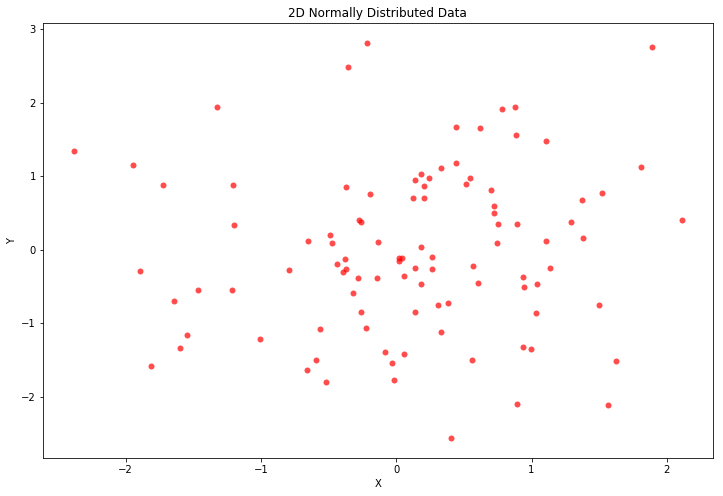

In [8]:
# Simulate data
n = 100
x = np.random.normal(size=n)
y = np.random.normal(size=n)

# Generate figure with matplotlib
fig, ax = plt.subplots(figsize=(12,8))

# Plot scatter of randomly distributed data
ax.scatter(x, y, c='r', lw=0, alpha=0.7)

# Annotate plot
ax.set_title('2D Normally Distributed Data')
ax.set_xlabel('X')
ax.set_ylabel('Y')

## Simulating Categorical Data

Suppose we wanted to simulate draws of a categorical variable, like pet types.  We can take the same conceptual approach, although if we want anything other than a uniform distribution, we need to specify it explicitly as a vector of probabilities.

In [10]:
# Define categorical variables
pets = ['bird', 'dog', 'cat', 'fish']

# Define draw probabilities
pet_probs = [0.05, 0.5, 0.35, 0.1]

# Capture draws from pet categories
pet_draws = np.random.choice(pets, size=100, p=pet_probs)

pet_draws

array(['fish', 'dog', 'dog', 'dog', 'cat', 'fish', 'fish', 'bird', 'cat',
       'cat', 'cat', 'cat', 'dog', 'dog', 'cat', 'dog', 'cat', 'cat',
       'dog', 'bird', 'dog', 'dog', 'dog', 'fish', 'fish', 'cat', 'dog',
       'dog', 'fish', 'cat', 'cat', 'dog', 'cat', 'dog', 'dog', 'dog',
       'dog', 'fish', 'dog', 'dog', 'dog', 'dog', 'fish', 'dog', 'dog',
       'dog', 'cat', 'dog', 'dog', 'dog', 'bird', 'cat', 'dog', 'cat',
       'cat', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'cat', 'cat',
       'dog', 'dog', 'dog', 'dog', 'cat', 'dog', 'dog', 'dog', 'dog',
       'cat', 'dog', 'cat', 'dog', 'dog', 'dog', 'dog', 'dog', 'fish',
       'dog', 'cat', 'cat', 'fish', 'dog', 'cat', 'cat', 'bird', 'cat',
       'dog', 'dog', 'cat', 'dog', 'dog', 'cat', 'cat', 'dog', 'cat', 'dog'],
      dtype='<U4')

We can now confirm that the draws followed the probability scheme we envisioned.

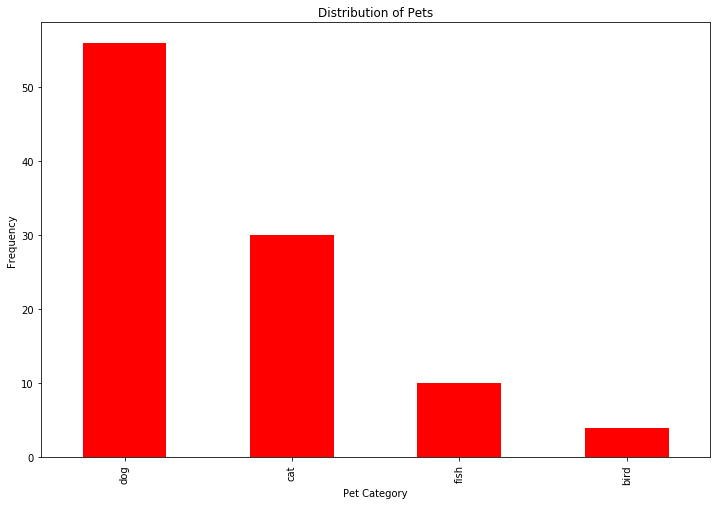

In [24]:
# Generate figure with matplotlib
fig, ax = plt.subplots(figsize=(12,8))

# Plot scatter of randomly distributed data
pd.Series(pet_draws).value_counts().plot(kind='bar', ax=ax, color='r')

# Annotate plot
ax.set_title('Distribution of Pets')
ax.set_xlabel('Pet Category')
ax.set_ylabel('Frequency');